In [3]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import pandas as pd

import time
from requests import Session
import sys # if the path is not present in sys.path, use sys.path.insert to include the directory
import re

import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib as mpl
from pylab import rcParams
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_theme(style='white')
#% matplotlib inline
from datetime import datetime

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from transformers import BertTokenizer, BertModel
from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance
from bertopic.representation import PartOfSpeech

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
nltk.download('maxent_ne_chunker')
nltk.download('words')
from langdetect import detect, DetectorFactory

import string
import gensim
import collections
from gensim.corpora import Dictionary
import difflib 
from matplotlib_venn import venn3
from venn import venn

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction
from sklearn.linear_model import LogisticRegression
from bertopic.backend import WordDocEmbedder

import gensim.downloader as api
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.similarities import WordEmbeddingSimilarityIndex

from re import sub
from multiprocessing import cpu_count

from gensim.similarities import SparseTermSimilarityMatrix
from gensim.similarities import SoftCosineSimilarity

from xgboost import XGBClassifier
import argparse
from keybert import KeyBERT
from sklearn.metrics.pairwise import cosine_similarity

from keybert import KeyBERT
from sentence_transformers import SentenceTransformer
from bertopic.backend import WordDocEmbedder
from bertopic import BERTopic
import gensim.downloader as api
from hdbscan import HDBSCAN
import umap

from autocorrect import Speller
from itertools import combinations
from nltk import skipgrams

from bs4 import BeautifulSoup
import requests
import csv
import time
import math

import itertools
import collections
import re
import networkx as nx
from itertools import chain

import re
import string
import gc
import warnings
warnings.filterwarnings('ignore')

import config

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
sys.path.append('/Users/aditidutta/Library/CloudStorage/OneDrive-UniversityofExeter/Miscellaneous/Research-Paper-Explorer')

In [4]:
# Rather not use the API key, as fetches irrelevant search results
'''
api_key = config.semantic_api_key

headers = {
        'Content-type': 'application/json',
        'x-api-key': api_key
    }

query = 'sexism misogyny'
offset = 0

url = 'https://api.semanticscholar.org/graph/v1/paper/search?query={query}&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles'
'''


In [5]:
'''

year = 2013

json_data = []
offset = 0
limit= 100

while True: # As long as the url exists
    # print('Requesting', url)
    # print('Offset', offset)
    # Make the request
    responses = requests.get(f'{url}&year={year}&offset={offset}&limit={limit}', headers=headers, stream = True)
    json = responses.json()
    # Check if the sum of offset and limit exceeds 10000 or if any values are left
    # To avoid {'error': 'offset + limit must be < 10000'} Why? Check the About.md for answers
    if 'data' not in json: 
        year += 1
        if year > 2022:
            print(f'Reached {year}, so ending search now')
            break
        else:
            offset = 0 #set the offset to 0 again, as starts from the beginning
            responses = requests.get(f'{url}&year={year}&offset={offset}&limit={limit}', headers=headers, stream = True)
            json = responses.json()
            offset = offset + 100
            json_data.extend(json['data'])
            time.sleep(10)
            print(f'Results of {year} started')
    elif offset+limit >= 10000:
        break
    else:
        offset = offset + 100
        json_data.extend(json['data'])
        time.sleep(10)
    
'''

Results of 2014 started
Results of 2015 started
Results of 2016 started
Results of 2017 started
Results of 2018 started
Results of 2019 started
Results of 2020 started
Results of 2021 started
Results of 2022 started
Reached 2023, so ending search now


Observation when using simple requests: The URL value does not fetch any value after offset=600 is reached, with a limit of 100. This is true even when the total number of search results exceeds much beyond that.

In [ ]:
'''
json_data = []

######## SEXISM #####

### 2012 ###

print('Starting year 2012 searches')

# 2012 -- offset=0, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2012&offset=0&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2012 -- offset=100, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2012&offset=100&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2012 -- offset=200, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2012&offset=200&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2012 -- offset=300, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2012&offset=300&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data']) 

# 2012 -- offset=400, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2012&offset=400&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])


### 2013 ###

print('Starting year 2013 searches')

# 2013 -- offset=0, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2013&offset=0&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2013 -- offset=100, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2013&offset=100&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2013 -- offset=200, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2013&offset=200&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2013 -- offset=300, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2013&offset=300&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2013 -- offset=400, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2013&offset=400&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2013 -- offset=500, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2013&offset=500&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])


### 2014 ###

print('Starting year 2014 searches')

# 2014 -- offset=0, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2014&offset=0&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2014 -- offset=100, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2014&offset=100&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2014 -- offset=200, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2014&offset=200&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2014 -- offset=300, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2014&offset=300&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2014 -- offset=400, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2014&offset=400&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2014 -- offset=500, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2014&offset=500&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2014 -- offset=600, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2014&offset=600&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])


### 2015 ###

print('Starting year 2015 searches')

# 2015 -- offset=0, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2015&offset=0&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2015 -- offset=100, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2015&offset=100&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2015 -- offset=200, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2015&offset=200&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2015 -- offset=300, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2015&offset=300&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2015 -- offset=400, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2015&offset=400&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2015 -- offset=500, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2015&offset=500&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2015 -- offset=600, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2015&offset=600&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])


### 2016 ###

print('Starting year 2016 searches')

# 2016 -- offset=0, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2016&offset=0&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2016 -- offset=100, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2016&offset=100&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2016 -- offset=200, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2016&offset=200&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2016 -- offset=300, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2016&offset=300&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2016 -- offset=400, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2016&offset=400&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2016 -- offset=500, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2016&offset=500&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2016 -- offset=600, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2016&offset=600&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])


### 2017 ###

print('Starting year 2017 searches')

# 2017 -- offset=0, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2017&offset=0&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2017 -- offset=100, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2017&offset=100&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2017 -- offset=200, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2017&offset=200&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2017 -- offset=300, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2017&offset=300&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2017 -- offset=400, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2017&offset=400&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2017 -- offset=500, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2017&offset=500&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2017 -- offset=600, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2017&offset=600&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])


### 2018 ###

print('Starting year 2018 searches')

# 2018 -- offset=0, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2018&offset=0&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2018 -- offset=100, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2018&offset=100&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2018 -- offset=200, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2018&offset=200&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2018 -- offset=300, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2018&offset=300&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2018 -- offset=400, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2018&offset=400&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2018 -- offset=500, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2018&offset=500&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2018 -- offset=600, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2018&offset=600&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])


### 2019 ###

print('Starting year 2019 searches')

# 2019 -- offset=0, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2019&offset=0&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2019 -- offset=100, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2019&offset=100&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2019 -- offset=200, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2019&offset=200&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2019 -- offset=300, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2019&offset=300&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2019 -- offset=400, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2019&offset=400&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2019 -- offset=500, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2019&offset=500&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2019 -- offset=600, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2019&offset=600&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

### 2020 ###

print('Starting year 2020 searches')

# 2020 -- offset=0, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2020&offset=0&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2020 -- offset=100, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2020&offset=100&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2020 -- offset=200, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2020&offset=200&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2020 -- offset=300, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2020&offset=300&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2020 -- offset=400, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2020&offset=400&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2020 -- offset=500, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2020&offset=500&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2020 -- offset=600, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2020&offset=600&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])


### 2021 ###

print('Starting year 2021 searches')

# 2021 -- offset=0, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2021&offset=0&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2021 -- offset=100, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2021&offset=100&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2021 -- offset=200, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2021&offset=200&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2021 -- offset=300, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2021&offset=300&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2021 -- offset=400, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2021&offset=400&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2021 -- offset=500, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2021&offset=500&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2021 -- offset=600, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2021&offset=600&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])


### 2022 ###

print('Starting year 2022 searches')

# 2022 -- offset=0, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2022&offset=0&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2022 -- offset=100, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2022&offset=100&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2022 -- offset=200, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2022&offset=200&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2022 -- offset=300, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2022&offset=300&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2022 -- offset=400, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2022&offset=400&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2022 -- offset=500, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2022&offset=500&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])

# 2022 -- offset=600, limit=100
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles&year=2022&offset=600&limit=100'
response = requests.get(url)
data = response.json()
json_data.extend(data['data'])
'''

In [4]:
# Automated, but without the API credentials
year = 2013

json_data = []
offset = 0
limit= 100

# Sexism
print('Starting the results for sexism')
#query = 'sexism'
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=sexism&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles'

while True: # As long as the url exists
    # print('Requesting', url)
    # print('Offset', offset)
    # Make the request
    responses = requests.get(f'{url}&year={year}&offset={offset}&limit={limit}')
    json = responses.json()
    # Check if the sum of offset and limit exceeds 10000 or if any values are left
    # To avoid {'error': 'offset + limit must be < 10000'} Why? Check the About.md for answers
    if 'data' not in json: 
        year += 1
        if year > 2022:
            print(f'Reached {year} for sexism, so ending search now')
            break
        else:
            offset = 0 #set the offset to 0 again, as starts from the beginning
            responses = requests.get(f'{url}&year={year}&offset={offset}&limit={limit}')
            json = responses.json()
            if 'data' in json: 
                offset = offset + 100
                json_data.extend(json['data'])
                time.sleep(3)
                print(f'Results of {year} started for sexism')
            else:
                print(f'No search results for the year {year} in sexism')
                continue
    elif offset+limit >= 10000:
        print(f'Reached search engine limit for year {year} in sexism')
        continue
    else:
        offset = offset + 100
        json_data.extend(json['data'])
        time.sleep(3)

# Misogyny

print('Starting the results for misogyny')
# Reinitializing the parameters
year = 2013
offset = 0
#query = 'misogyny'
url = 'https://api.semanticscholar.org/graph/v1/paper/search?query=misogyny&sort=relevance&fields=url,abstract,authors,title,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,openAccessPdf,fieldsOfStudy,s2FieldsOfStudy,citationStyles'

while True: # As long as the url exists
    # print('Requesting', url)
    # print('Offset', offset)
    # Make the request
    responses = requests.get(f'{url}&year={year}&offset={offset}&limit={limit}')
    json = responses.json()
    # Check if the sum of offset and limit exceeds 10000 or if any values are left
    # To avoid {'error': 'offset + limit must be < 10000'} Why? Check the About.md for answers
    if 'data' not in json: 
        year += 1
        if year > 2022:
            print(f'Reached {year} for misogyny, so ending search now')
            break
        else:
            offset = 0 #set the offset to 0 again, as starts from the beginning
            responses = requests.get(f'{url}&year={year}&offset={offset}&limit={limit}')
            json = responses.json()
            if 'data' in json: 
                offset = offset + 100
                json_data.extend(json['data'])
                time.sleep(3)
                print(f'Results of {year} started for misogyny')
            else:
                print(f'No search results for the year {year} in misogyny')
                continue
    elif offset+limit >= 10000:
        print(f'Reached search engine limit for year {year} in misogyny')
        continue
    else:
        offset = offset + 100
        json_data.extend(json['data'])
        time.sleep(3)

Starting the results for sexism
Results of 2014 started for sexism
Results of 2015 started for sexism
Results of 2016 started for sexism
Results of 2017 started for sexism
Results of 2018 started for sexism
Results of 2019 started for sexism
Results of 2020 started for sexism
Results of 2021 started for sexism
Results of 2022 started for sexism
Reached 2023 for sexism, so ending search now
Starting the results for misogyny
Results of 2014 started for misogyny
Results of 2015 started for misogyny
Results of 2016 started for misogyny
Results of 2017 started for misogyny
Results of 2018 started for misogyny
Results of 2019 started for misogyny
Results of 2020 started for misogyny
Results of 2021 started for misogyny
Results of 2022 started for misogyny
Reached 2023 for misogyny, so ending search now


In [6]:
df = pd.DataFrame(json_data)
df['index'] = df.index
df

paperId  \
0      9bb0ffd1e63553b3948f44b27e1467cfff5acb91   
1      c77fbf03df7cd1595beaa80692c3236ff9dc2de5   
2      851aa1a840c09c78265e147de7118ac07b0d1adb   
3      271f70144e1ed085292bac8037353e7cc1a675c0   
4      e11a25962cb9d0262da1013c0e1852b74d6d9f52   
...                                         ...   
10876  9ce73b483b2dc92593240f525362dfa520cc4d1c   
10877  9a68feac23f2db2a3f41f302f3b7397add809a83   
10878  c61f34c9cd05328bd787dac66591b3d3243a500b   
10879  8786de8e45135a31ee20cc212e2230f797c955ec   
10880  c0404c0666bba9d351e914b0ef444ee42a9e0775   

                                                     url  \
0      https://www.semanticscholar.org/paper/9bb0ffd1...   
1      https://www.semanticscholar.org/paper/c77fbf03...   
2      https://www.semanticscholar.org/paper/851aa1a8...   
3      https://www.semanticscholar.org/paper/271f7014...   
4      https://www.semanticscholar.org/paper/e11a2596...   
...                                                  ...   
10876  https://www.semanticscholar.org/paper/9ce73b48...   
10877  https://www.semanticscholar.org/paper/9a68feac...   
10878  https://www.semanticscholar.org/paper/c61f34c9...   
10879  https://www.semanticscholar.org/paper/8786de8e...   
10880  https://www.semanticscholar.org/paper/c0404c06...   

                                                   title  \
0      The Structure of Knowledge in Westernized Univ...   
1      Weightism, racism, classism, and sexism: share...   
2      Ambivalent sexism, empathy and law enforcement...   
3      Men’s Hostile Sexism and Biased Perceptions of...   
4      Ambivalent sexism and perceptions of men and w...   
...                                                  ...   
10876  Leydi Felsefe mi yoksa gizli bir Bath’lı Kadın...   
10877  DOES DISCRIMINATION MODERATE THE RELATIONSHIP ...   
10878  Ukrainian Reality Shows as a Tool of Discrimin...   
10879  For This Moment and Beyond: Solidarity, Sense-...   
10880  Characterizing Experience and Regulation of Se...   

                                                abstract  \
0      I. INTRODUCTION The work of Enrique Dussel, li...   
1                                                   None   
2      Police attitudes towards partner violence agai...   
3      Hostile sexism (HS) expresses attitudes that c...   
4      This study draws on ambivalent sexism theory t...   
...                                                  ...   
10876  Renowned as a reference book of Dante and Chau...   
10877  \n Discrimination and experiences of prejudice...   
10878  Introduction. Children’s rights need special a...   
10879  How do we do theater at a time like this? The ...   
10880  Female gamers frequently experience harassment...   

                                                venue  year  referenceCount  \
0                                                      2013              39   
1                        Journal of Adolescent Health  2013              32   
2                                                      2013              93   
3          Personality and Social Psychology Bulletin  2013              46   
4                                                      2013              46   
...                                               ...   ...             ...   
10876  RumeliDE Dil ve Edebiyat Araştırmaları Dergisi  2022               6   
10877                             Innovation in aging  2022               0   
10878                                           Obraz  2022               0   
10879                                 Women's Studies  2022              31   
10880                                                  2022              14   

       citationCount  influentialCitationCount  isOpenAccess  \
0                333                        39         False   
1                130                         2          True   
2                 68                         5         False   
3                 55                         7         Fals

In [7]:
df.year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [8]:
'''
df['abstract'] = df['abstract'].fillna("")

# df_test = df[df['abstract'].str.contains(r"identification", case=False)]
# df['check_contains'] = df['abstract'].str.contains('|'.join(['sexism identification', 'sexism detection', 'misogyny identification', 'misogyny detection']))

string_match = ['sexism', 'misogyny']

def find_index(string_text):
    for fstr in string_match:
        if fstr.find(string_text) != -1:
            res = "True"
        else:
            res = "False"
    return res
     

df['contains'] = df['abstract'].apply(find_index)

df = df[df.contains == "True"]
#df = df.drop(columns=['contains'])

'''

'\ndf[\'abstract\'] = df[\'abstract\'].fillna("")\n\n# df_test = df[df[\'abstract\'].str.contains(r"identification", case=False)]\n# df[\'check_contains\'] = df[\'abstract\'].str.contains(\'|\'.join([\'sexism identification\', \'sexism detection\', \'misogyny identification\', \'misogyny detection\']))\n\nstring_match = [\'sexism\', \'misogyny\']\n\ndef find_index(string_text):\n    for fstr in string_match:\n        if fstr.find(string_text) != -1:\n            res = "True"\n        else:\n            res = "False"\n    return res\n     \n\ndf[\'contains\'] = df[\'abstract\'].apply(find_index)\n\ndf = df[df.contains == "True"]\n#df = df.drop(columns=[\'contains\'])\n\n'

In [9]:
df.abstract.isna().sum()

2317

In [10]:
# df.to_csv('semantic_scholar_data.csv')

In [11]:
'''

# firstly fill NaN with an empty string and apply the selection operation. Otherwise we will get ValueError.
df['abstract'] = df['abstract'].fillna("")

# df_test = df[df['abstract'].str.contains(r"identification", case=False)]
# df['check_contains'] = df['abstract'].str.contains('|'.join(['sexism identification', 'sexism detection', 'misogyny identification', 'misogyny detection']))

string_match = ['sexism identification', 'sexism detection', 'sexism classification', 'sexism prediction', 'misogyny identification', 'misogyny detection', 'misogyny classification', 'misogyny prediction', 'violence against women', 'hate speech']

def find_index(string_text):
    for fstr in string_match:
        if fstr.find(string_text) != -1:
            res = "True"
        else:
            res = "False"
    return res
     

df['contains'] = df['abstract'].apply(find_index)

'''

'\n\n# firstly fill NaN with an empty string and apply the selection operation. Otherwise we will get ValueError.\ndf[\'abstract\'] = df[\'abstract\'].fillna("")\n\n# df_test = df[df[\'abstract\'].str.contains(r"identification", case=False)]\n# df[\'check_contains\'] = df[\'abstract\'].str.contains(\'|\'.join([\'sexism identification\', \'sexism detection\', \'misogyny identification\', \'misogyny detection\']))\n\nstring_match = [\'sexism identification\', \'sexism detection\', \'sexism classification\', \'sexism prediction\', \'misogyny identification\', \'misogyny detection\', \'misogyny classification\', \'misogyny prediction\', \'violence against women\', \'hate speech\']\n\ndef find_index(string_text):\n    for fstr in string_match:\n        if fstr.find(string_text) != -1:\n            res = "True"\n        else:\n            res = "False"\n    return res\n     \n\ndf[\'contains\'] = df[\'abstract\'].apply(find_index)\n\n'

In [12]:
#df.contains.value_counts()

In [13]:
# Only keep the data which has those keywords
#df = df[df.contains == "True"]
#df = df.drop(columns=['contains'])
df = df.drop(columns=['paperId', 'url'])
df = df.drop_duplicates(subset=['title', 'abstract']).reset_index(drop=True) # Some may be duplicated. So remove those based on same title and abstract
df

title  \
0     The Structure of Knowledge in Westernized Univ...   
1     Weightism, racism, classism, and sexism: share...   
2     Ambivalent sexism, empathy and law enforcement...   
3     Men’s Hostile Sexism and Biased Perceptions of...   
4     Ambivalent sexism and perceptions of men and w...   
...                                                 ...   
9738  Leydi Felsefe mi yoksa gizli bir Bath’lı Kadın...   
9739  DOES DISCRIMINATION MODERATE THE RELATIONSHIP ...   
9740  Ukrainian Reality Shows as a Tool of Discrimin...   
9741  For This Moment and Beyond: Solidarity, Sense-...   
9742  Characterizing Experience and Regulation of Se...   

                                               abstract  \
0     I. INTRODUCTION The work of Enrique Dussel, li...   
1                                                  None   
2     Police attitudes towards partner violence agai...   
3     Hostile sexism (HS) expresses attitudes that c...   
4     This study draws on ambivalent sexism theory t...   
...                                                 ...   
9738  Renowned as a reference book of Dante and Chau...   
9739  \n Discrimination and experiences of prejudice...   
9740  Introduction. Children’s rights need special a...   
9741  How do we do theater at a time like this? The ...   
9742  Female gamers frequently experience harassment...   

                                               venue  year  referenceCount  \
0                                                     2013              39   
1                       Journal of Adolescent Health  2013              32   
2                                                     2013              93   
3         Personality and Social Psychology Bulletin  2013              46   
4                                                     2013              46   
...                                              ...   ...             ...   
9738  RumeliDE Dil ve Edebiyat Araştırmaları Dergisi  2022               6   
9739                             Innovation in aging  2022               0   
9740                                           Obraz  2022               0   
9741                                 Women's Studies  2022              31   
9742                                                  2022              14   

      citationCount  influentialCitationCount  isOpenAccess  \
0               333                        39         False   
1               130                         2          True   
2                68                         5         False   
3                55                         7         False   
4                37                         8          True   
...             ...                       ...           ...   
9738              0                         0          True   
9739              0                         0         False   
9740              0                         0         False   
9741              0                         0         False   
9742              0                         0         False   

                                          openAccessPdf  \
0                                                  None   
1     {'url': 'https://europepmc.org/articles/pmc369...   
2                                                  None   
3                                                  None   
4     {'url': 'http://eprints.lincoln.ac.uk/id/eprin...   
...                                                 ...   
9738  {'url': 'https://dergipark.org.tr/en/download/...   
9739                                               None   
9740                                               None   
9741                                               None   
9742                                               None   

               fieldsOfStudy  \
0                [Sociology]   
1     [Psychology, Medicine]   
2               [Psychology]   
3     [Psychology, Medicine]   
4               [Psychology]   
...                      ...   
9738 

In [14]:
df.columns

Index(['title', 'abstract', 'venue', 'year', 'referenceCount', 'citationCount',
       'influentialCitationCount', 'isOpenAccess', 'openAccessPdf',
       'fieldsOfStudy', 's2FieldsOfStudy', 'citationStyles', 'authors',
       'index'],
      dtype='object')

### Remove abstracts which have null value

In [15]:
# Remove the ones with null abstracts
df = df[~df['abstract'].isna()]

### Keep only the english 

In [16]:
'''
def detect_lang(text):
    try:
        lang = detect(text)
    except:
        lang = ""
    return lang

df['language'] = df['abstract'].apply(detect_lang)
'''

'\ndef detect_lang(text):\n    try:\n        lang = detect(text)\n    except:\n        lang = ""\n    return lang\n\ndf[\'language\'] = df[\'abstract\'].apply(detect_lang)\n'

In [17]:
#df['language'].value_counts()

In [18]:
#df = df[(df['language'] == "en")]
#len(df)

## Open access across years, based on disciplines

But first, some data preprocessing needs to be done, as the ```fieldsOfStudy``` variable is a list.

In [19]:
df.fieldsOfStudy

0                  [Sociology]
2                 [Psychology]
3       [Psychology, Medicine]
4                 [Psychology]
5       [Psychology, Medicine]
                 ...          
9738                      None
9739                      None
9740                      None
9741                      None
9742                      None
Name: fieldsOfStudy, Length: 7803, dtype: object

In [20]:
df.fieldsOfStudy.isna().sum()

1605

Remove the dataframes with null values

In [21]:
df = df[~df.fieldsOfStudy.isna()]

In [22]:
fields = df.fieldsOfStudy.copy()

fields = fields.explode()
fields_index = fields.index.to_list()
fields_name = fields.to_list()
fields = [fields_index, fields_name]
fields = pd.DataFrame(fields).transpose()
fields.columns = ['index', 'name']

# unique_fields = list(fields.name.unique()) # Will be useful later

fields = fields.groupby(by='index')['name'].apply(lambda x:x.str.cat(sep=", ")).reset_index(drop=True)
fields = pd.DataFrame(fields)
fields['index'] = fields.index

fields

name  index
0                         Sociology      0
1                        Psychology      1
2              Psychology, Medicine      2
3                        Psychology      3
4              Psychology, Medicine      4
...                             ...    ...
6193               Computer Science   6193
6194  Computer Science, Mathematics   6194
6195                            Art   6195
6196               Computer Science   6196
6197                       Medicine   6197

[6198 rows x 2 columns]

In [23]:
fields_type = fields['name'].to_list()
unique_fields = []
for i in fields_type:
    i = i.split(", ")
    for j in i:
        if j not in unique_fields:
            if j != '':
                unique_fields.append(j)
        else:
            continue

unique_fields

['Sociology',
 'Psychology',
 'Medicine',
 'Political Science',
 'Art',
 'Computer Science',
 'Engineering',
 'History',
 'Philosophy',
 'Geography',
 'Economics',
 'Business',
 'Biology',
 'Mathematics',
 'Physics',
 'Geology',
 'Environmental Science']

Drop the original variable, and replace it with the new one.

In [24]:
# drop the column 'fieldsOfStudy'
df = df.drop(columns=['fieldsOfStudy'])

# merge the above dataframe to this one
df = pd.merge(df, fields, on="index").rename(columns={'name': 'fieldsOfStudy'}) # drops the rows with null values

In [25]:
# Create two dataframes based on Computer Science and Social Science

# All computer science and related fields
df_comp = df[df.fieldsOfStudy.str.contains('Computer Science') == True]
df_engg = df[df.fieldsOfStudy.str.contains('Engineering') == True]
df_maths = df[df.fieldsOfStudy.str.contains('Mathematics') == True]
df_comp = pd.concat([df_comp, df_engg, df_maths])
df_comp = df_comp.drop_duplicates(subset=['index']).reset_index(drop=True) #dropping rows with same index values

# All social science and related fields
df_soc = df[df.fieldsOfStudy.str.contains('Sociology') == True]
df_pol = df[df.fieldsOfStudy.str.contains('Political Science') == True]
df_phy = df[df.fieldsOfStudy.str.contains('Philosophy') == True]
df_psc = df[df.fieldsOfStudy.str.contains('Psychology') == True]
df_soc = pd.concat([df_soc, df_pol, df_phy, df_psc])
df_soc = df_soc.drop_duplicates(subset=['index']).reset_index(drop=True) #dropping rows with same index values

Select only the manuscripts containing the string matches for computer science and engineering, as we do not want it to effect the clustering of topics.

In [26]:
len(df_comp), len(df_soc)

(220, 3065)

Since we have a lot of entries from Social Science, we can cut down on them based on language. Focusing solely on the research paper in English.

In [27]:
def detect_lang(text):
    try:
        lang = detect(text)
    except:
        lang = ""
    return lang

# Social Science
df_soc['language'] = df_soc['abstract'].apply(detect_lang)
df_soc = df_soc[(df_soc['language'] == "en")]
# Computer Science
df_comp['language'] = df_comp['abstract'].apply(detect_lang)
df_comp = df_comp[(df_comp['language'] == "en")]

In [28]:
len(df_comp), len(df_soc)

(214, 2959)

## Some topic modelling

[How to reduce outliers?](https://maartengr.github.io/BERTopic/faq.html#how-do-i-reduce-topic-outliers)

First, the amount of datapoint classified as outliers is handled by the min_samples parameters in HDBSCAN. This value is automatically set to the same value of min_cluster_size. However, you can set it independently if you want to reduce the number of generated outliers. Lowering this value will result in less noise being generated.

Second, after training our BERTopic model, we can assign outliers to topics by making use of the .reduce_outliers function in BERTopic. An advantage of using this approach is that there are four built in strategies one can choose for reducing outliers. Moreover, this technique allows the user to experiment with reducing outliers across a number of strategies and parameters without actually having to re-train the topic model each time.

#### Computer Science

In [29]:
# Create representation models
keybert_model = KeyBERTInspired(top_n_words=30)
mmr_model = MaximalMarginalRelevance(diversity=0.0)
pos_patterns = [
            [{'POS': 'ADJ'}, {'POS': 'NOUN'}],
            [{'POS': 'NOUN'}], [{'POS': 'ADJ'}]
]
pos_model = PartOfSpeech("en_core_web_sm", pos_patterns=pos_patterns) 

representation_models = [pos_model, keybert_model, mmr_model]

#word_model = api.load('fasttext-wiki-news-subwords-300')
sentence_model = SentenceTransformer("all-mpnet-base-v2") # all-MiniLM-L6-v2
#word_doc_embedder = WordDocEmbedder(embedding_model=sentence_model, word_embedding_model=word_model)
embeddings_comp = sentence_model.encode(df_comp['abstract'].to_list(), show_progress_bar=True)

#umap_model = umap.UMAP(n_neighbors=10, n_components=5, min_dist=0.0, metric='cosine', random_state=1234)
cluster_model = KMeans(n_clusters=5)
#vectorizer_model = CountVectorizer(stop_words="english")
#vectorizer_model = TfidfVectorizer()

#reduced_embeddings_comp = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings_comp)

topic_model_comp = BERTopic(
    language='english', # Set to 'multilingual' for datasets with languages other than English. # a few other languages set so changing from 'english'
    top_n_words=30,
    n_gram_range=(1, 3),
    #min_topic_size=10,
    nr_topics= 'auto',
    low_memory=False,
    calculate_probabilities=True, # The probabilities of all topics per document.
    representation_model=representation_models,
    embedding_model=sentence_model,
    hdbscan_model= cluster_model, 
    #umap_model=umap_model, 
    #vectorizer_model=vectorizer_model
)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [30]:
topics_comp, probs_comp = topic_model_comp.fit_transform(df_comp['abstract'].to_list(), embeddings_comp) #reduced_embeddings_comp

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [31]:
# Reduce outliers using chain strategies, since those contain a lot of documents on sexism
# Use the "c-TF-IDF" strategy with a threshold
#new_topics_comp = topic_model_comp.reduce_outliers(df_comp['abstract'].to_list(), topics_comp, strategy="c-tf-idf", threshold=0.7)
# Reduce outliers using the `probabilities` strategy
#new_topics_comp = topic_model_comp.reduce_outliers(df_comp['abstract'].to_list(), topics_comp, threshold=0.5, probabilities=probs_comp, strategy="probabilities")
# Reduce based on 'embeddings'
#new_topics_comp = topic_model_comp.reduce_outliers(df_comp['abstract'].to_list(), topics_comp, strategy="embeddings")

In [32]:
#topic_model_comp.update_topics(df_comp['abstract'].to_list(), topics=new_topics_comp)
topic_model_comp.get_topic_info()

Topic  Count                                               Name
0      0     48     0_sexism and_feminist_oppression_racism sexism
1      1     47  1_sexism and_ambivalent sexism_hostile sexism_...
2      2     43      2_sexism and_discrimination_and sexism_sexism
3      3     38                3_sexism in_sexism_of sexism_sexist
4      4     38               4_feminism_sexism and_feminist_media

In [33]:
topic_model_comp.generate_topic_labels()

['0_sexism and_feminist_oppression',
 '1_sexism and_ambivalent sexism_hostile sexism',
 '2_sexism and_discrimination_and sexism',
 '3_sexism in_sexism_of sexism',
 '4_feminism_sexism and_feminist']

In [41]:
topics_change_comp = {0: 'Gender oppression', 1: 'Ambivalent sexism', 2: 'Gender discrimination', 
                      3: 'Sexism', 4: 'Feminist theories'}
topic_model_comp.set_topic_labels(topics_change_comp)

In [42]:
topic_model_comp.visualize_barchart(topics=None, top_n_topics=5, n_words=10, custom_labels=True, width=350, height=350)

In [44]:
topic_model_comp.visualize_documents(df_comp['abstract'].to_list(), custom_labels=True, width=750, height=500) 
                                     #,reduced_embeddings=reduced_embeddings_comp, 
                               # hide_document_hover=True, hide_annotations=True)

### Social Science

In [45]:
umap_model = umap.UMAP(n_neighbors=200, n_components=80, min_dist=0.0, metric='cosine', random_state=123)
#hdbscan_model = HDBSCAN(min_cluster_size=50, metric='euclidean', 
#                       cluster_selection_method='eom', prediction_data=True, min_samples=20)
cluster_model = KMeans(n_clusters=20) #If used instead of hdbscan
#vectorizer_model = CountVectorizer(stop_words="english")
vectorizer_model = TfidfVectorizer()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
#word_model = api.load('fasttext-wiki-news-subwords-300')
sentence_model = SentenceTransformer("all-mpnet-base-v2") # all-MiniLM-L6-v2
#word_doc_embedder = WordDocEmbedder(embedding_model=sentence_model, word_embedding_model=word_model)
embeddings_soc = sentence_model.encode(df_soc['abstract'].to_list(), show_progress_bar=True)

# Create representation models
keybert_model = KeyBERTInspired(top_n_words=30)
mmr_model = MaximalMarginalRelevance(diversity=0.0)
pos_patterns = [
            [{'POS': 'ADJ'}, {'POS': 'NOUN'}],
            [{'POS': 'NOUN'}], [{'POS': 'ADJ'}]
]
pos_model = PartOfSpeech("en_core_web_sm", pos_patterns=pos_patterns) 

representation_models = [pos_model, keybert_model, mmr_model]

# We reduce our embeddings to 2D as it will allows us to quickly iterate later on
#reduced_embeddings_soc = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings_soc)

topic_model_soc = BERTopic(
    language='english', # Set to 'multilingual' for datasets with languages other than English. # selected only the english ones
    top_n_words=30,
    n_gram_range=(1, 3),
    min_topic_size=50,
    nr_topics= 'auto',
    embedding_model=sentence_model,
    low_memory=False,
    calculate_probabilities=True, # The probabilities of all topics per document.
    representation_model=representation_models,
    umap_model=umap_model, 
    #vectorizer_model=vectorizer_model,
    hdbscan_model= cluster_model, #hdbscan_model
    ctfidf_model=ctfidf_model
)

Batches:   0%|          | 0/93 [00:00<?, ?it/s]

In [46]:
#embeddings = sentence_model.encode(df_soc['abstract'].to_list(), show_progress_bar=True)

In [47]:
topics_soc, probs_soc = topic_model_soc.fit_transform(df_soc['abstract'].to_list(), embeddings_soc)  #reduced_embeddings_soc 

In [48]:
# Reduce outliers
#new_topics_soc = topic_model_soc.reduce_outliers(df_soc['abstract'].to_list(), topics_soc)

In [49]:
# Reduce outliers using chain strategies, since those contain a lot of documents on sexism
# Use the "c-TF-IDF" strategy with a threshold
#new_topics_soc = topic_model_soc.reduce_outliers(df_soc['abstract'].to_list(), topics_soc, strategy="c-tf-idf", threshold=0.1)
# Reduce outliers using the `probabilities` strategy
#new_topics_soc = topic_model_soc.reduce_outliers(df_soc['abstract'].to_list(), topics_soc, threshold=0.05, probabilities=probs_soc, strategy="probabilities")
# Reduce outliers using embeddings
#new_topics_soc = topic_model_soc.reduce_outliers(df_soc['abstract'].to_list(), topics_soc, strategy="embeddings")

In [50]:
#topic_model_soc.update_topics(df_soc['abstract'].to_list(), topics=new_topics_soc)
topic_model_soc.get_topic_info()

Topic  Count                                               Name
0       0    251  0_sexist attitudes_ambivalent sexism_sexism_be...
1       1    227         1_feminist_black women_racism and_literary
2       2    200  2_of linguistic sexism_linguistic sexism_sexis...
3       3    195  3_intersectionality_activists_activism_civil r...
4       4    188        4_women of color_sexism_pedagogy_racism and
5       5    171                5_lgbtq_lgbt_transgender_oppression
6       6    161   6_feminist media_feminism_post feminism_feminist
7       7    159  7_stem fields_engineering and_of engineering_g...
8       8    153    8_of advertising_advertising_media and_feminist
9       9    152  9_rape myth acceptance_rape myths_rape myth_se...
10     10    135  10_ambivalent sexism inventory_sexism inventor...
11     11    128         11_sexismo_gender violence_society_mujeres
12     12    128  12_gender inequality_sexism_sexual harassment ...
13     13    126  13_sexism and_female politicians_julia gillard...
14     14    115   14_ecological_animal rights_speciesism_societies
15     15    107  15_sport studies_the sport_athletes and_of sports
16     16    103  16_radical feminist theory_feminist theory_pat...
17     17    102  17_attitudes toward_sexual orientation_ageism_...
18     18     99       18_of religion_theology_theological_religion
19     19     59  19_game culture_of video games_video games in_...

In [51]:
topic_model_soc.generate_topic_labels()

['0_sexist attitudes_ambivalent sexism_sexism',
 '1_feminist_black women_racism and',
 '2_of linguistic sexism_linguistic sexism_sexist language',
 '3_intersectionality_activists_activism',
 '4_women of color_sexism_pedagogy',
 '5_lgbtq_lgbt_transgender',
 '6_feminist media_feminism_post feminism',
 '7_stem fields_engineering and_of engineering',
 '8_of advertising_advertising_media and',
 '9_rape myth acceptance_rape myths_rape myth',
 '10_ambivalent sexism inventory_sexism inventory_the ambivalent sexism',
 '11_sexismo_gender violence_society',
 '12_gender inequality_sexism_sexual harassment and',
 '13_sexism and_female politicians_julia gillard',
 '14_ecological_animal rights_speciesism',
 '15_sport studies_the sport_athletes and',
 '16_radical feminist theory_feminist theory_patriarchy',
 '17_attitudes toward_sexual orientation_ageism',
 '18_of religion_theology_theological',
 '19_game culture_of video games_video games in']

In [52]:
topics_change_soc = {0: 'Sexist attitudes', 1:'Sexism and racism', 2:'Linguistics of sexism', 3:'Sexism and intersectionality',
                     4: 'Sexism and color', 5:'Queer studies', 6:'Feminist media', 7:'Sexism in technology',
                     8:'Sexism in advertising', 9:'Rape myths', 10:'Ambivalent sexism', 11:'Gender violence',
                     12:'Gender inequality', 13:'Sexism in politics', 14:'Speciecism', 15:'Sexism in sports',
                     16:'Radical feminist thoery', 17:'Sexism and ageism', 18:'Sexism and religion', 19:'Sexism in gaming'}

topic_model_soc.set_topic_labels(topics_change_soc)

In [53]:
#topics_change_soc = {-1: 'Outliers', 0: 'Sexism, feminist and gender studies', 1: 'Sexism in sports',
#                        2: 'Sexism in gaming', 3: 'Sexism in education'}
#topic_model_soc.set_topic_labels(topics_change_soc)

In [54]:
topic_model_soc.visualize_barchart(topics=None, top_n_topics=5, n_words=10, custom_labels=True, width=350, height=350)

In [55]:
topic_model_soc.visualize_documents(df_soc['abstract'].to_list(), custom_labels=True, width=750, height=500)
# reduced_embeddings=reduced_embeddings_soc, hide_document_hover=True, hide_annotations=True,

### Open accessibility across the disciplines over the years

In [56]:
df_comp['Discipline'] = 'Computer Science'
df_soc['Discipline'] = 'Social Science'
df_combined = pd.concat([df_comp, df_soc], axis = 0)

In [57]:
df_combined_oa = df_combined[['year', 'isOpenAccess', 'Discipline']]
df_combined_oa = df_combined_oa.groupby(['year', 'Discipline', 'isOpenAccess']).size().unstack()
#df_combined_oa = df_combined_oa.value_counts(normalize=True)

#df_combined_oa['percentage'] = df_combined_oa.groupby(['Discipline', 'year'])['isOpenAccess'].transform(lambda z: z / z.sum() * 100)
df_combined_oa

isOpenAccess           False   True
year Discipline                    
2013 Computer Science    1.0    1.0
     Social Science    270.0   37.0
2014 Computer Science   12.0    NaN
     Social Science    334.0   53.0
2015 Computer Science   16.0    1.0
     Social Science    318.0   52.0
2016 Computer Science   15.0    5.0
     Social Science    376.0   67.0
2017 Computer Science   16.0    7.0
     Social Science    326.0  112.0
2018 Computer Science   26.0   10.0
     Social Science    325.0  125.0
2019 Computer Science   18.0   10.0
     Social Science    216.0   84.0
2020 Computer Science   47.0   29.0
     Social Science    160.0  104.0

Index(['title', 'abstract', 'venue', 'year', 'referenceCount', 'citationCount',
       'influentialCitationCount', 'isOpenAccess', 'openAccessPdf',
       's2FieldsOfStudy', 'citationStyles', 'authors', 'index',
       'fieldsOfStudy', 'Discipline', 'language'],
      dtype='object')

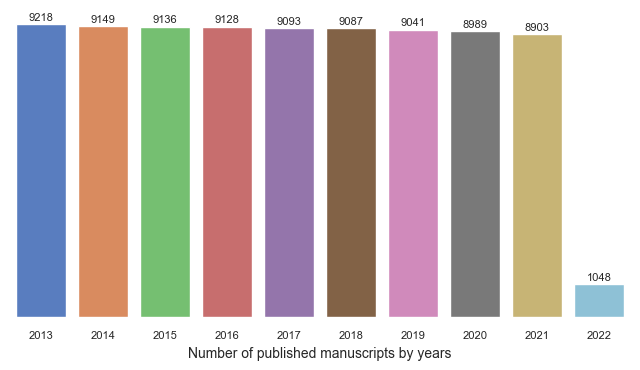

In [ ]:
df_pub_years = pd.DataFrame({
    'year': df['year'].dropna().unique(),
    'count': df['year'].value_counts().tolist()
})
# df_pub_years = df_pub_years[~(df_pub_years.year <= 2012)]
df_pub_years = df_pub_years.sort_values(by='year', ascending=True)
tick_val = df_pub_years.year.to_list()

f, ax = plt.subplots(figsize=(8, 4))
palette = sns.color_palette("muted")
p = sns.barplot(x="year", y="count", data=df_pub_years,
            label="count", palette=palette)
#ax.set(ylim=(0, 2100))
# new helper method to auto-label bars
ax.bar_label(ax.containers[0], fontsize=8, padding=1.5)
sns.despine(left=True, bottom=True)
p.set_xlabel("Number of published manuscripts by years", fontsize=10)
p.set_ylabel("",fontsize=10)
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
p.tick_params(labelsize=8)

In [ ]:
len(df[df.isOpenAccess==True]), len(df)

(27589, 90257)

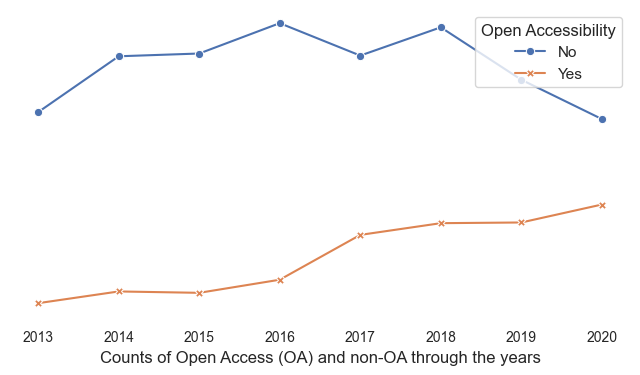

In [58]:
df_mnscr_only_yrs = df[['year', 'isOpenAccess']].groupby(['year'])['isOpenAccess'].value_counts().reset_index(name='total')

f, ax = plt.subplots(figsize=(8, 4))
palette = sns.color_palette("muted")
p = sns.lineplot(
    data=df_mnscr_only_yrs,
    x="year", y="total", hue="isOpenAccess", style="isOpenAccess",
    markers=True, dashes=False
)
p.set(yticklabels=[])
sns.despine(left=True, bottom=True)
p.set_xlabel("Counts of Open Access (OA) and non-OA through the years", fontsize=12)
p.set_ylabel("",fontsize=8)

plt.legend(title='Open Accessibility', loc='upper right', labels=['No', 'Yes'])
p.tick_params(labelsize=10)

## Keyword occurrences

In [62]:
# For cleaning the text
def remove_uns(text):
    text = str(text)
    #text = text.capitalize()
    text= text.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    text= re.sub(r'http\S+', '',cleantext)
    text = re.sub('[0-9]+', '', text)
    text = text.capitalize()
    tokens = nltk.word_tokenize(text) #tokenize
    text = [w for w in tokens if w.isalpha()]  
    stops = set(stopwords.words("english")) #eliminate stopwords
    text = [word for word in text if not word in stops]
    return ( " ".join(text)) #rejoin the words


# Using the same model as we used so far
kw_model = KeyBERT(model='all-mpnet-base-v2')

def extraction(text):
    keywords = kw_model.extract_keywords(text, 
                                     keyphrase_ngram_range=(1, 3), 
                                     stop_words='english', 
                                     highlight=False,
                                     top_n=5)
    listed_keys= []
    for i in keywords:
        listed_keys.append(str(i[0]))
    return listed_keys


# Function to couple the terms
def coupling_terms(list_):
    res= [(j,i) for i in list_ for j in list_ if j not in i 
       if set(j.split('_')[1:]) < set(i.split('_'))][::2]
    return res

### Computer Science

In [63]:
df_comp['clean_abstract'] = df_comp['abstract'].apply(remove_uns)
df_comp['keywords'] = df_comp['clean_abstract'].apply(extraction)

In [64]:
# Remove collection words
collection_words = ['ai', 'artificial intelligence', 'natural language', 'natural language processing', 'language processing',
                   'nlp', 'machine learning', 'learning', 'deep learning', 'artificial intelligence', 
                    'artificial intelligence ai', 'ai intelligence', 'intelligence ai', 'intelligence'
                   'ml', 'dl', 'ellen wachtel', 'driven recommendation', 'facebook ai']

def remove_words(list_):
    temp_list = []
    intersect = set(list_).intersection(collection_words)
    for i in list_:
        if i in intersect:
            continue
        else:
            temp_list.append(i)
    return temp_list

df_comp['coupled_keywords'] = df_comp['keywords'].apply(remove_words)
df_comp['coupled_keywords'] = df_comp['coupled_keywords'].apply(coupling_terms)
df_comp['coupled_keywords']

0      [(higher education inclusive, intersecting opp...
1      [(transform rural communities, rural transform...
2      [(rape victims scandinavian, correlates rape a...
3      [(beauvoir describes woman, oppression times b...
4      [(confront sexism successfully, strategies con...
                             ...                        
215    [(use indonesian perspective, indonesian persp...
216    [(sexism gender inequality, introduction sexis...
217    [(gender stereotypes children, sexism parental...
218    [(palestinian female students, gender inequali...
219    [(philosopher john trudell, sioux activist pol...
Name: coupled_keywords, Length: 214, dtype: object

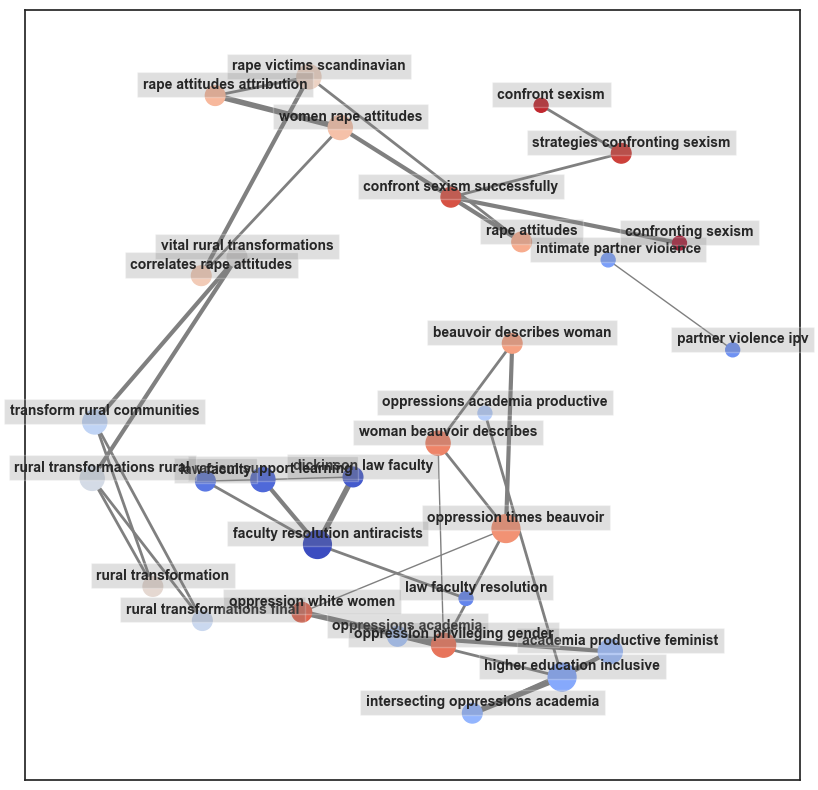

In [65]:
terms_b= df_comp['coupled_keywords'] 
bigrams_comp = list(chain.from_iterable(terms_b)) #list(itertools.chain(*terms_b))

# Create counter of words in clean bigrams
bigram_counts_comp = collections.Counter(bigrams_comp)

bigram_df_comp = pd.DataFrame(bigram_counts_comp.most_common(50),
                             columns=['bigram', 'count'])

d = bigram_df_comp.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    degree = dict(G.degree)

#G.add_node("sexism", weight=100)

color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)


fig, ax = plt.subplots(figsize=(10, 10))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=[v * 1 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 100 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.03, value[1]+.02
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=10, weight='bold')
    
plt.savefig('images/keywords_co-occurrence_cs.png')
plt.show()

### Social Science

In [66]:
df_soc['clean_abstract'] = df_soc['abstract'].apply(remove_uns)
df_soc['keywords'] = df_soc['clean_abstract'].apply(extraction)

df_soc['coupled_keywords'] = df_soc['keywords'].apply(coupling_terms)

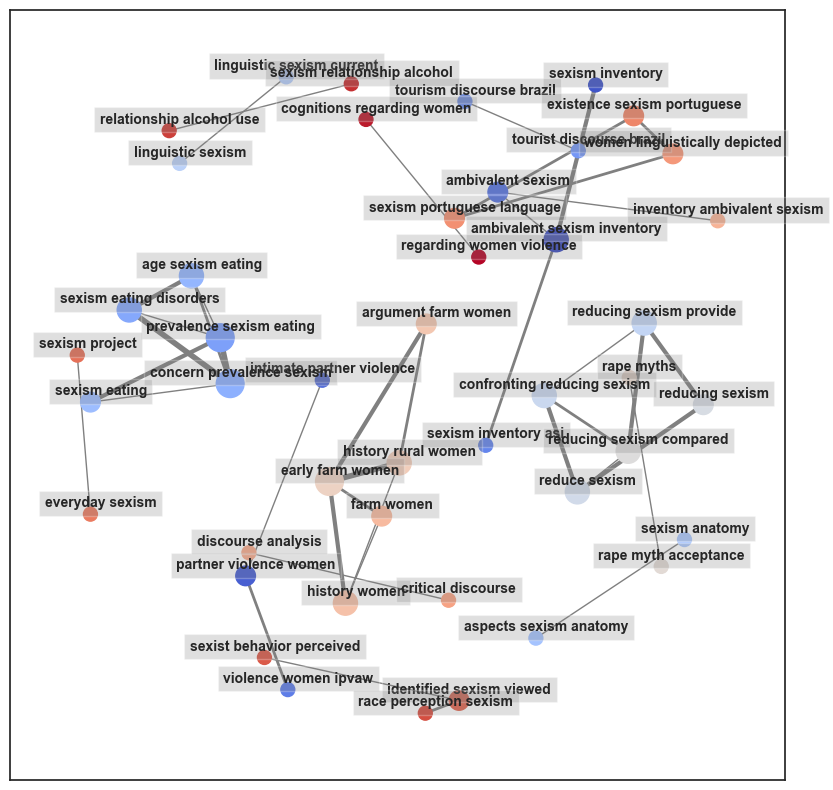

In [68]:
terms_b= df_soc['coupled_keywords'] 
bigrams_soc = list(chain.from_iterable(terms_b)) #list(itertools.chain(*terms_b))

# Create counter of words in clean bigrams
bigram_counts_soc = collections.Counter(bigrams_soc)

bigram_df_soc = pd.DataFrame(bigram_counts_soc.most_common(50),
                             columns=['bigram', 'count'])

d = bigram_df_soc.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    degree = dict(G.degree)

#G.add_node("sexism", weight=100)

color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)


fig, ax = plt.subplots(figsize=(10, 10))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=[v * 1 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 100 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.03, value[1]+.02
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=10, weight='bold')
    
plt.savefig('images/keywords_co-occurrence_ss.png')
plt.show()

## Authors

In [ ]:
authors = pd.json_normalize(df['authors'])
authors

0    \
0            {'authorId': '48250539', 'name': 'M. Gahr'}   
1             {'authorId': '48269460', 'name': 'Y. Zhu'}   
2      {'authorId': '144126656', 'name': 'Muhammad Sa...   
3      {'authorId': '1784772', 'name': 'Stefan Borgwa...   
4         {'authorId': '3183042', 'name': 'W. Mazairac'}   
...                                                  ...   
16720     {'authorId': '104762920', 'name': 'H. Truong'}   
16721        {'authorId': '4405461', 'name': 'W. Boyes'}   
16722  {'authorId': '2119590427', 'name': 'Trent D. W...   
16723  {'authorId': '2962154', 'name': 'Jan Kristof N...   
16724      {'authorId': '2152926535', 'name': 'Peng Li'}   

                                                     1    \
0      {'authorId': '6649767', 'name': 'R. Freudenmann'}   
1        {'authorId': '40002075', 'name': 'R. Stephens'}   
2         {'authorId': '1712107', 'name': 'A. N. Ngomo'}   
3        {'authorId': '33329252', 'name': 'M. Lippmann'}   
4          {'authorId': '144204299', 'name': 'J. Beetz'}   
...                                                  ...   
16720  {'authorId': '2195297670', 'name': 'C. S. McLa...   
16721  {'authorId': '2150747630', 'name': 'Bradley Be...   
16722   {'authorId': '1491864271', 'name': 'K. Nusbaum'}   
16723    {'authorId': '3068011', 'name': 'R. H. Güting'}   
16724     {'authorId': '13761016', 'name': 'Xueqian He'}   

                                                     2    \
0           {'authorId': '3221145', 'name': 'C. Hiemke'}   
1          {'authorId': '1738356', 'name': 'P. Meltzer'}   
2         {'authorId': '1764853', 'name': 'J. Parreira'}   
3      {'authorId': '1861119', 'name': 'Veronika Thost'}   
4                                                   None   
...                                                  ...   
16720                                               None   
16721        {'authorId': '66351963', 'name': 'G. Chan'}   
16722    {'authorId': '2004392864', 'name': 'T. Gilkey'}   
16723                                               None   
16724     {'authorId': '2025998342', 'name': 'Jie Dong'}   

                                                     3    \
0           {'authorId': '49553257', 'name': 'M. Kölle'}   
1          {'authorId': '145019259', 'name': 'S. Davis'}   
2      {'authorId': '3236392', 'name': 'Helena F. Deus'}   
3                                                   None   
4                                                   None   
...                                                  ...   
16720                                               None   
16721    {'authorId': '30549208', 'name': 'B. Thornton'}   
16722    {'authorId': '35394123', 'name': 'J. Trinidad'}   
16723                                               None   
16724   {'authorId': '47558438', 'name': 'You-Wei Chen'}   

                                                     4    \
0      {'authorId': '1397477366', 'name': 'C. Schönfe...   
1                                                   None   
2        {'authorId': '1733076', 'name': 'M. Hauswirth'}   
3                                                   None   
4                                                   None   
...                                                  ...   
16720                                               None   
16721      {'authorId': '48972477', 'name': 'P. Harten'}   
16722  {'authorId': '5005851', 'name': 'B. Kaffenberg...   
16723                                               None   
16724     {'authorId': '2186539050', 'name': 'Qin Zhou'}   

                                                     5     6     7     8    \
0                                                   None  None  None  None   
1                                                   None  None  None  None   
2                                                   None  None  None  None   
3                                                   None  None  None  None   
4                                                   None  

In [ ]:
authors[0].isna().sum() # Interesting that 26 manuscripts do not have any first author
# We should later drop them

24

In [ ]:
print("Number of null values in authors: \n First author: {first}\n Second author: {second} \n Third author: {third} \n Fourth author: {fourth}\n Fifth author: {fifth}\n Sixth author: {sixth}".format(first=authors[0].isna().sum(), second= authors[1].isna().sum(), third= authors[2].isna().sum(), fourth= authors[3].isna().sum(), fifth= authors[4].isna().sum(), sixth= authors[5].isna().sum()))

Number of null values in authors: 
 First author: 24
 Second author: 1422 
 Third author: 4766 
 Fourth author: 8573
 Fifth author: 11742
 Sixth author: 13744


#### Separate the authors' name and id from the dictionary

In [ ]:
nested_authors1 = pd.json_normalize(authors[0]).rename(columns={'authorId':'author_1_id', 'name':'author_1_name'})
nested_authors1['index'] = nested_authors1.index
nested_authors1

author_1_id           author_1_name  index
0        48250539                 M. Gahr      0
1        48269460                  Y. Zhu      1
2       144126656         Muhammad Saleem      2
3         1784772        Stefan Borgwardt      3
4         3183042             W. Mazairac      4
...           ...                     ...    ...
16720   104762920               H. Truong  16720
16721     4405461                W. Boyes  16721
16722  2119590427         Trent D. Walker  16722
16723     2962154  Jan Kristof Nidzwetzki  16723
16724  2152926535                 Peng Li  16724

[16725 rows x 3 columns]

Let's check if the combinations are unique to each author. (Can also check with the sizes)

This result could be useful later as well, for analysis.

In [ ]:
# to get unique combinations of the authors and names
nested_authors1_comb = nested_authors1.groupby(['author_1_id','author_1_name']).size().reset_index().rename(columns={0:'count'})
nested_authors1_comb = nested_authors1_comb.sort_values(by='count', ascending=False)
auth_dict_1 = nested_authors1_comb.set_index('author_1_id').to_dict()['author_1_name']

In [ ]:
# Following the same technique from the previous author 1 set
# Author 2
nested_authors2 = pd.json_normalize(authors[1]).rename(columns={'authorId':'author_2_id', 'name':'author_2_name'})
nested_authors2['index'] = nested_authors2.index
nested_authors2_comb = nested_authors2.groupby(['author_2_id','author_2_name']).size().reset_index().rename(columns={0:'count'})
nested_authors2_comb = nested_authors2_comb.sort_values(by='count', ascending=False)
auth_dict_2 = nested_authors2_comb.set_index('author_2_id').to_dict()['author_2_name']

# Author 3
nested_authors3 = pd.json_normalize(authors[2]).rename(columns={'authorId':'author_3_id', 'name':'author_3_name'})
nested_authors3['index'] = nested_authors3.index
nested_authors3_comb = nested_authors3.groupby(['author_3_id','author_3_name']).size().reset_index().rename(columns={0:'count'})
nested_authors3_comb = nested_authors3_comb.sort_values(by='count', ascending=False)
auth_dict_3 = nested_authors3_comb.set_index('author_3_id').to_dict()['author_3_name']

# Author 4
nested_authors4 = pd.json_normalize(authors[3]).rename(columns={'authorId':'author_4_id', 'name':'author_4_name'})
nested_authors4['index'] = nested_authors4.index
nested_authors4_comb = nested_authors4.groupby(['author_4_id','author_4_name']).size().reset_index().rename(columns={0:'count'})
nested_authors4_comb = nested_authors4_comb.sort_values(by='count', ascending=False)
auth_dict_4 = nested_authors4_comb.set_index('author_4_id').to_dict()['author_4_name']

# Author 5
nested_authors5 = pd.json_normalize(authors[4]).rename(columns={'authorId':'author_5_id', 'name':'author_5_name'})
nested_authors5['index'] = nested_authors5.index
nested_authors5_comb = nested_authors5.groupby(['author_5_id','author_5_name']).size().reset_index().rename(columns={0:'count'})
nested_authors5_comb = nested_authors5_comb.sort_values(by='count', ascending=False)
auth_dict_5 = nested_authors5_comb.set_index('author_5_id').to_dict()['author_5_name']

# Author 6
nested_authors6 = pd.json_normalize(authors[5]).rename(columns={'authorId':'author_6_id', 'name':'author_6_name'})
nested_authors6['index'] = nested_authors6.index
nested_authors6_comb = nested_authors6.groupby(['author_6_id','author_6_name']).size().reset_index().rename(columns={0:'count'})
nested_authors6_comb = nested_authors6_comb.sort_values(by='count', ascending=False)
auth_dict_6 = nested_authors6_comb.set_index('author_6_id').to_dict()['author_6_name']

Merge the dataframes

In [ ]:
#only run once
df = pd.merge(df, nested_authors1, on="index")
df = pd.merge(df, nested_authors2, on="index")
df = pd.merge(df, nested_authors3, on="index")
df = pd.merge(df, nested_authors4, on="index")
df = pd.merge(df, nested_authors5, on="index")
df = pd.merge(df, nested_authors6, on="index")

### Combining all the authors together in a single column

In [ ]:
df['all_authors'] = df[['author_1_name', 'author_2_name', 
                                      'author_3_name', 'author_4_name',
                                     'author_5_name', 'author_6_name']].fillna('').agg(', '.join, axis=1)

def prepros_auth(text):
    text = text.rstrip(', ') # to remove the trailing commas
    return text

df['all_authors'] = df['all_authors'].apply(prepros_auth)

df['all_authors']

0       A. T. Hofstede, C. Ouyang, M. Rosa, Liang Song...
1                           Johannes Lorey, Felix Naumann
2       P. Afshani, Manindra Agrawal, Benjamin Doerr, ...
3                             T. Kumar, B. Arun, L. Kumar
4                  G. Koutrika, E. Pitoura, K. Stefanidis
                              ...                        
3213                                 M. Templ, M. Sariyar
3214                      Jie Yuan, Yan Wang, Zhicheng Ji
3215    P. Vázquez-Quintal, R. I. Rodríguez-Vivas, D. ...
3216    A. Boffa, P. Ferragina, Francesco Tosoni, Gior...
3217    P. Laboudie, Thomas Dymond, C. Kreviazuk, G. G...
Name: all_authors, Length: 3218, dtype: object

Drop the columns which has no authors name in them.

In [ ]:
df.iloc[1665]

paperId                              03a8772a97e6a743e6b84cf43ad8e7f1431c3dd3
url                         https://www.semanticscholar.org/paper/03a8772a...
title                       The Mosaic Test: measuring the effectiveness o...
abstract                                                                     
venue                                       Multimedia tools and applications
year                                                                     2013
referenceCount                                                             28
citationCount                                                               7
influentialCitationCount                                                    0
isOpenAccess                                                             True
openAccessPdf               {'url': 'https://publications.aston.ac.uk/id/e...
fieldsOfStudy                                              [Computer Science]
s2FieldsOfStudy             [{'category': 'Computer Science', 's

In [ ]:
df = df[~df['all_authors'].isna()]
df

paperId  \
0     4c8b9f5cd78c85921d2279b8f8488263cab12533   
1     05fd4e094d788c9c7a2f23f3dc6e08269ab54152   
2     1fb34d60c831f4c662c9c6fdf86fbc46619f268e   
3     db9d9cf85b0ca73460dd171e37966f2acb443385   
4     b7240e3028f568d587bccfe9a0bee42fd8044212   
...                                        ...   
3213  ee3aed86c046d644bcbfb9ceae81884da79e2c02   
3214  7a7067a1434c3a992b85da23b8018bbce4c2f6e6   
3215  471e7e94f026396eb934ade2a3de7aab21ba5634   
3216  9bcf547ff85738857d0df28c34b32794fb479cdb   
3217  c2914e0afa15d7412ba159b0490b44fbdcdd4f44   

                                                    url  \
0     https://www.semanticscholar.org/paper/4c8b9f5c...   
1     https://www.semanticscholar.org/paper/05fd4e09...   
2     https://www.semanticscholar.org/paper/1fb34d60...   
3     https://www.semanticscholar.org/paper/db9d9cf8...   
4     https://www.semanticscholar.org/paper/b7240e30...   
...                                                 ...   
3213  https://www.semanticscholar.org/paper/ee3aed86...   
3214  https://www.semanticscholar.org/paper/7a7067a1...   
3215  https://www.semanticscholar.org/paper/471e7e94...   
3216  https://www.semanticscholar.org/paper/9bcf547f...   
3217  https://www.semanticscholar.org/paper/c2914e0a...   

                                                  title abstract  \
0     Pregabalin abuse and dependence in Germany: re...            
1     SRAdb: query and use public next-generation se...            
2     DAW: Duplicate-AWare Federated Query Processin...            
3     Temporal Query Answering in the Description Lo...            
4     BIMQL - An open query language for building in...            
...                                                 ...      ...   
3213  Fuzzy Logic Based Similarity Measure for Infor...            
3214  Quantum Distributed Computing Applied to Grove...            
3215  Algebraic Optimization of RDF Graph Pattern Qu...            
3216  Extracorporeal Membrane Oxygenation in Childre...            
3217  Online Clustering Algorithm for Restructuring ...            

                                                  venue  year  referenceCount  \
0             European Journal of Clinical Pharmacology  2013              69   
1                                    BMC Bioinformatics  2013               6   
2            International Workshop on the Semantic Web  2013              29   
3     International Symposium on Frontiers of Combin...  2013              29   
4                      Advanced Engineering Informatics  2013              40   
...                                                 ...   ...             ...   
3213  International Conference on Distributed Comput...  2014              14   
3214                       Computing with New Resources  2014              22   
3215                           Large Scale and Big Data  2014              42   
3216                               Pediatric Cardiology  2014              25   
3217  International Conference on Frontiers in Intel...  2014              13   

      citationCount  influentialCitationCount  isOpenAccess  ...  \
0               113                         8         False  ...   
1               114                         9          True  ...   
2                84                        10          True  ...   
3                52                         6         False  ...   
4               119                        11         False  ...   
...             ...                       ...           ...  ...   
3213              2                         1         False  ...   
3214              1                         0         False  ...   
3215              2                         0         False  ...   
3216             14                         1         False  ...   
3217              2                         0         False  ...   

              author_2_name author_3_id       author_3_name author_4_id  \
0                 C. Ouyang     1691344        

### Co-authorship network

In [ ]:
def auth_comb(string):
    words= string.split(", ")
    pairs = list(skipgrams(words, n=2, k=len(words)-1))
    return pairs

df['paired_authors'] = df['all_authors'].apply(auth_comb)
#excludes single authors from the list
# as only concerned with multiple pairs

df['paired_authors']

0       [(A. T. Hofstede, C. Ouyang), (A. T. Hofstede,...
1                       [(Johannes Lorey, Felix Naumann)]
2       [(P. Afshani, Manindra Agrawal), (P. Afshani, ...
3       [(T. Kumar, B. Arun), (T. Kumar, L. Kumar), (B...
4       [(G. Koutrika, E. Pitoura), (G. Koutrika, K. S...
                              ...                        
3213                             [(M. Templ, M. Sariyar)]
3214    [(Jie Yuan, Yan Wang), (Jie Yuan, Zhicheng Ji)...
3215    [(P. Vázquez-Quintal, R. I. Rodríguez-Vivas), ...
3216    [(A. Boffa, P. Ferragina), (A. Boffa, Francesc...
3217    [(P. Laboudie, Thomas Dymond), (P. Laboudie, C...
Name: paired_authors, Length: 3218, dtype: object

In [ ]:
# only keeping the rows with NO empty lists

data_paired_auth = df[df['paired_authors'].map(lambda d: len(d)) > 0]

In [ ]:
auth_term_bigram= data_paired_auth['paired_authors']
#auth_bigrams = list(itertools.chain(*auth_term_bigram))
auth_bigrams = list(chain.from_iterable(auth_term_bigram))

# Create counter of words in clean bigrams
auth_bigram_counts = collections.Counter(auth_bigrams)

auth_bigram_counts= auth_bigram_counts.most_common(100)

#data_paired_auth = pd.DataFrame.from_dict(auth_bigram_counts, orient='index').reset_index()
data_paired_auth = pd.DataFrame(auth_bigram_counts,
                             columns=['auth_bigram', 'count'])

#data_paired_auth = data_paired_auth.rename(columns={'index':'auth_bigram', 0:'count'})
data_paired_auth

auth_bigram  count
0       (Shunsuke Inenaga, H. Bannai)      6
1       (Shunsuke Inenaga, M. Takeda)      6
2              (H. Bannai, M. Takeda)      6
3              (Yiqun Liu, Min Zhang)      5
4            (Yiqun Liu, Shaoping Ma)      5
..                                ...    ...
95  (Diego Mollá Aliod, Cécile Paris)      2
96                  (T. Le, Huayu Wu)      2
97                (T. Le, Jiaheng Lu)      2
98                (Huayu Wu, T. Ling)      2
99              (T. Ling, Jiaheng Lu)      2

[100 rows x 2 columns]

In [ ]:
# Create dictionary of bigrams and their counts
d = data_paired_auth.set_index('auth_bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    # creating node size depending on node degree
    degree = dict(G.degree)

color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=15,
                 width=[v * 2 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 100 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.015, value[1]+.015
    ax.text(x, y,
            s=key,
            #bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=15, weight='bold')

plt.show()